In [1]:
#Set the path to the hawkes library
import os 
import sys

dirs_to_add = [
    os.path.join("..", "build"),
    os.path.join("..", "build", "Debug"),
    os.path.join("..", "build", "Release")
]

for d in dirs_to_add:
    sys.path.insert(0, d)

In [2]:
import hawkes
from model import hawkesModel
from plot import plotHeatmap, plotIntensity
import numpy as np

# Hawkes Tests

In [8]:
# Test the simulate_hawkes function
mu = np.array([2.0, 1.5, 0.01, 0.1, 0.8, 2.0, 0.3, 0.2, 0.5, 1.5])
alpha = np.array([
    [0.5, 0.1, 3.0, 2.0, 0.4, 2.4, 0.1, 1.5, 0.1, 0.1],
    [0.2, 0.6, 3.0, 0.1, 0.2, 0.1, 0.7, 1.2, 0.1, 0.5],
    [3.5, 3.0, 4.0, 3.0, 0.1, 2.0, 0.2, 1.3, 0.1, 2.0],
    [0.1, 0.2, 0.2, 0.5, 0.1, 0.1, 0.1, 0.2, 0.1, 2.0],
    [0.3, 0.1, 1.1, 1.0, 0.6, 0.8, 0.1, 1.5, 0.1, 0.1],
    [0.1, 0.2, 0.1, 0.1, 0.1, 0.4, 0.2, 0.1, 0.1, 3.],
    [0.1, 0.2, 2.0, 3.0, 0.5, 0.1, 0.3, 0.1, 0.5, 0.1],
    [3.0, 0.1, 0.3, 0.2, 0.4, 0.1, 0.1, 0.3, 0.6, 0.1],
    [0.1, 0.1, 0.1, 2.3, 0.1, 0.1, 3.0, 0.1, 0.1, 0.1],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]
])
beta = 2*np.array([
    [5.0, 5.0, 5.0, 7.5, 4.0, 5.0, 0.5, 5.0, 5.0, 5.0],
    [4.5, 6.0, 7.5, 4.0, 5.0, 5.5, 5.0, 3.0, 5.0, 5.0],
    [5.0, 5.5, 6.0, 4.5, 6.5, 7.0, 4.0, 2.0, 5.0, 5.0],
    [1.0, 5.0, 2.5, 3.0, 4.5, 1.5, 1.0, 3.0, 5.0, 5.0],
    [0.5, 5.0, 2.0, 1.5, 5.0, 1.0, 1.5, 2.0, 5.0, 5.0],
    [4.5, 7.0, 7.5, 3.0, 6.0, 5.0, 6.5, 0.5, 5.0, 5.0],
    [4.0, 6.5, 8.0, 3.5, 5.0, 6.0, 5.5, 0.5, 5.0, 5.0],
    [4.5, 6.0, 8.5, 4.0, 5.5, 6.5, 6.0, 0.5, 5.0, 5.0],
    [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0],
    [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
])
T = 1.0
nbThreads = 10
nbSimulations = 100000

result, jumpTimes = hawkes.SimulateHawkes(nbSimulations, nbThreads, mu, alpha, beta, T, False)

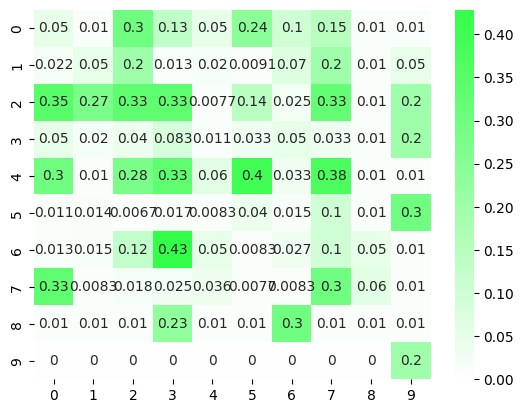

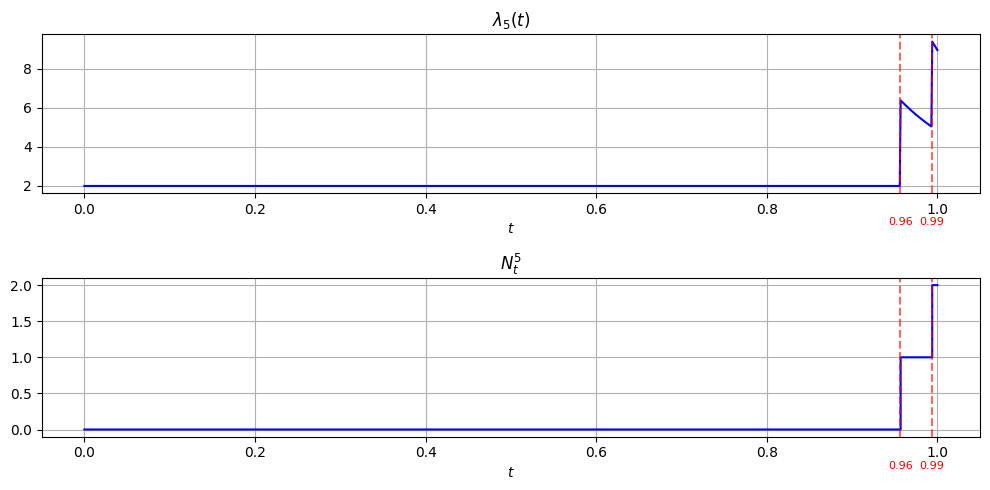

In [10]:
#Let's plot dimension dim and simulation
dim = 5
simulation = 100
h = hawkesModel(mu, alpha, beta, jumpTimes)
interval = np.linspace(0, T, 1000)
hawkesProcess = h.get_hawkesProcess(interval, dim, simulation)
intensity = h.get_intensity(interval, dim, simulation)
plotHeatmap(alpha, beta, ax=None)
plotIntensity(hawkesProcess, intensity, jumpTimes, dim, simulation, interval)